In [ ]:
pip install scikit-fuzzy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 13.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894077 sha256=a04c1019057e74baee3639335bb02236220287ec762b94a3914b27f5897f947d
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
pip install paho-mqtt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.4/99.4 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for paho-mqtt: filename=paho_mqtt-1.6.1-py3-none-any.whl size=62120 sha256=1cc1c52c2e411446204546e423e8a4ba4f25b1ef616fe3632748d69ebbefaee0
  Stored in directory: /root/.cache/pip/wheels/8b/bb/0c/79444d1dee20324d442856979b5b519b48828b0bd3d05df84a
Successfully built paho-mqtt


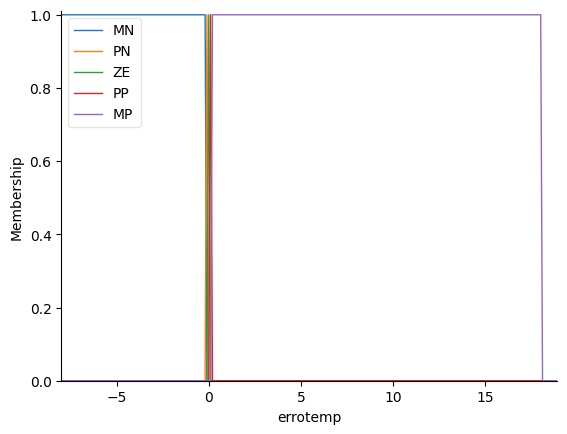

In [ ]:
import numpy as np
import skfuzzy as fuzz
import paho.mqtt.client as mqtt
from skfuzzy import control as ctrl
import time

# mqttBroker ="test.mosquitto.org"
# client = mqtt.Client("c213Inatelsbm")
# client.connect(mqttBroker)

# errotemp - funções de pertinência e universo
errotemp = ctrl.Antecedent(np.arange(-8, 19, 0.1), 'errotemp')
errotemp['MN'] = fuzz.trapmf(errotemp.universe, [-8, -8, -0.2, -0.1])
errotemp['PN'] = fuzz.trimf(errotemp.universe, [-0.2, -0.1, 0])
errotemp['ZE'] = fuzz.trimf(errotemp.universe, [-0.1, 0, 0.1])
errotemp['PP'] = fuzz.trimf(errotemp.universe, [0, 0.1, 0.2])
errotemp['MP'] = fuzz.trapmf(errotemp.universe, [0.1, 0.2, 18, 18])
errotemp.view()

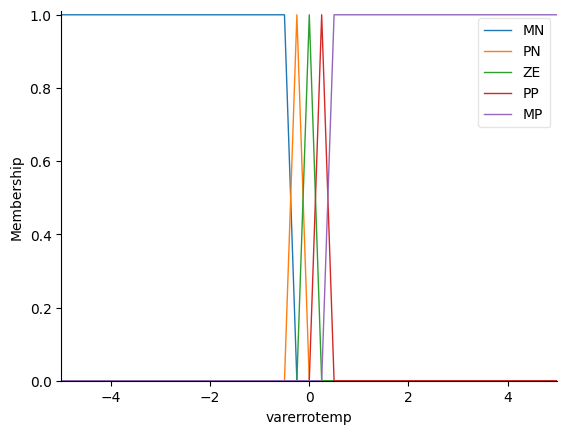

In [ ]:
# varrotemp - funções de pertinência e universo
# varerrotemp =ctrl.Antecedent(np.arange(-2, 2.01, 0.01), 'varerrotemp')
# varerrotemp['MN'] = fuzz.trapmf(varerrotemp.universe, [-2, -2, -0.2,-0.1])
# varerrotemp['PN'] = fuzz.trimf(varerrotemp.universe, [-0.2,-0.1,0])
# varerrotemp['ZE'] = fuzz.trimf(varerrotemp.universe, [-0.1, 0, 0.1])
# varerrotemp['PP'] = fuzz.trimf(varerrotemp.universe, [0, 0.1, 0.2])
# varerrotemp['MP'] = fuzz.trapmf(varerrotemp.universe,[0.1, 0.2, 2,2])
# varerrotemp.view()

varerrotemp =ctrl.Antecedent(np.arange(-5, 5.01, 0.01), 'varerrotemp')
varerrotemp['MN'] = fuzz.trapmf(varerrotemp.universe, [-5, -5, -0.5,-0.25])
varerrotemp['PN'] = fuzz.trimf(varerrotemp.universe, [-0.5,-0.25,0])
varerrotemp['ZE'] = fuzz.trimf(varerrotemp.universe, [-0.25, 0, 0.25])
varerrotemp['PP'] = fuzz.trimf(varerrotemp.universe, [0, 0.25, 0.5])
varerrotemp['MP'] = fuzz.trapmf(varerrotemp.universe,[0.25, 0.5, 5,5])
varerrotemp.view()

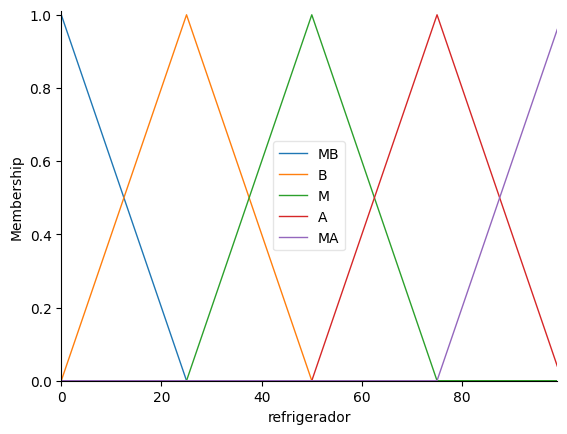

In [ ]:
# aquecedor - funções de pertinência e universo
refrigerador =ctrl.Consequent(np.arange(0, 100, 1), 'refrigerador')
refrigerador['MB'] = fuzz.trimf(refrigerador.universe, [0,0,25])
refrigerador['B'] = fuzz.trimf(refrigerador.universe, [0,25,50])
refrigerador['M'] = fuzz.trimf(refrigerador.universe, [25, 50, 75])
refrigerador['A'] = fuzz.trimf(refrigerador.universe, [50, 75, 100])
refrigerador['MA'] = fuzz.trimf(refrigerador.universe, [75, 100, 100])
refrigerador.view()

In [ ]:
regra1 = ctrl.Rule(errotemp['MN']& varerrotemp['MN'], refrigerador['MB'])
regra6 = ctrl.Rule(errotemp['MN']& varerrotemp['PN'], refrigerador['MB'])
regra11 = ctrl.Rule(errotemp['MN']& varerrotemp['ZE'], refrigerador['B'])
regra16 = ctrl.Rule(errotemp['MN']& varerrotemp['PP'], refrigerador['M'])
regra21 = ctrl.Rule(errotemp['MN']& varerrotemp['MP'], refrigerador['A'])
regra2 = ctrl.Rule(errotemp['PN']& varerrotemp['MN'], refrigerador['MB'])
regra7 = ctrl.Rule(errotemp['PN']& varerrotemp['PN'], refrigerador['MB'])
regra12 = ctrl.Rule(errotemp['PN']& varerrotemp['ZE'], refrigerador['B'])
regra17 = ctrl.Rule(errotemp['PN']& varerrotemp['PP'], refrigerador['M'])
regra22 = ctrl.Rule(errotemp['PN']& varerrotemp['MP'], refrigerador['A'])
regra3 = ctrl.Rule(errotemp['ZE']& varerrotemp['MN'], refrigerador['MB'])
regra8 = ctrl.Rule(errotemp['ZE']& varerrotemp['PN'], refrigerador['B'])
regra13 = ctrl.Rule(errotemp['ZE']& varerrotemp['ZE'], refrigerador['M'])
regra18 = ctrl.Rule(errotemp['ZE']& varerrotemp['PP'], refrigerador['A'])
regra23 = ctrl.Rule(errotemp['ZE']& varerrotemp['MP'], refrigerador['MA'])
regra4 = ctrl.Rule(errotemp['PP']& varerrotemp['MN'], refrigerador['B'])
regra9 = ctrl.Rule(errotemp['PP']& varerrotemp['PN'], refrigerador['M'])
regra14 = ctrl.Rule(errotemp['PP']& varerrotemp['ZE'], refrigerador['A'])
regra19 = ctrl.Rule(errotemp['PP']& varerrotemp['PP'], refrigerador['MA'])
regra24 = ctrl.Rule(errotemp['PP']& varerrotemp['MP'], refrigerador['MA'])
regra5 = ctrl.Rule(errotemp['MP']& varerrotemp['MN'], refrigerador['M'])
regra10 = ctrl.Rule(errotemp['MP']& varerrotemp['PN'], refrigerador['A'])
regra15 = ctrl.Rule(errotemp['MP']& varerrotemp['ZE'], refrigerador['MA'])
regra20 = ctrl.Rule(errotemp['MP']& varerrotemp['PP'], refrigerador['MA'])
regra25 = ctrl.Rule(errotemp['MP']& varerrotemp['MP'], refrigerador['MA'])


In [ ]:
refrigerador_ctrl = ctrl.ControlSystem([regra1, regra2, regra3,regra4,regra5,regra6, regra7, regra8,regra9,regra10,regra11, regra12, regra13,regra14,regra15,regra16, regra17, regra18,regra19,regra20,regra21, regra22, regra23,regra24,regra25])
potencia = ctrl.ControlSystemSimulation(refrigerador_ctrl)

In [ ]:
# parâmetros iniciais do sistema
sp=-2
tempatual=0
print(sp)
print(tempatual)
erroatual=-2
while True:
  erroanterior=erroatual
  erroatual=tempatual-sp
  varerroTemp=erroatual-erroanterior
  potencia.input['errotemp'] =erroatual
  potencia.input['varerrotemp'] =varerroTemp
  potencia.compute()

  # simulação da temperatura
  i=0
  while (i < 10):
    tempatual=tempatual * 0.9952 - potencia.output['refrigerador'] * 0.0003963
    time.sleep(0.01)
    i += 1

  # publicação dos resultados via MQTT
  print(tempatual)
  # client.publish("Aquecedor/Temperatura", tempatual)
  # client.publish("Aquecedor/erro", erroatual)

-2
0
-0.35294220227123907
-0.5855649736363048
-0.848922256654494
-1.09257259583644
-1.3320583320169683
-1.5602976038764682
-1.77792318293043
-1.9855911391430263
-2.03364022319619
-2.0942363410403213
-2.098281573450057
-2.099104479900627
-2.098752133245197
-2.0992439471962956
-2.0986876407290564
-2.0994581518900133
-2.098580746230887
-2.099796247619017
-2.098407520249825
-2.100331964065084
-2.0986134292337715
-2.1005383170149123
-2.0988100850756295
-2.1004602175275435
-2.0987377569920036
-2.1004871593003114
-2.0987626734732365
-2.1004779370113096
-2.0987541456616476
-2.100481095245884
-2.098757066106086
-2.1004800139908686
-2.0987560662676046
-2.1004803842027675
-2.098756408603951
-2.100480257449476
-2.0987562913947873
-2.1004803008477744
-2.0987563315253377
-2.1004802859889455
-2.0987563177853334
-2.100480291076355
-2.0987563224896744
-2.100480289334517
-2.098756320878991
-2.1004802899308888
-2.0987563214304585
-2.1004802897267036
-2.0987563212416496
-2.1004802897966095
-2.098756321306

KeyboardInterrupt: ignored